In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

t_file = pd.read_csv('globalterrorismdb_0617dist 2.csv', encoding='ISO-8859-1')


/Users/vikrambahl/anaconda/lib/python2.7/site-packages/cffi/model.py:525: UserWarning: 'point_conversion_form_t' has no values explicitly defined; guessing that it is equivalent to 'unsigned int'
  % self._get_c_name())
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
/Users/vikrambahl/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
list(t_file)

[u'eventid',
 u'iyear',
 u'imonth',
 u'iday',
 u'approxdate',
 u'extended',
 u'resolution',
 u'country',
 u'country_txt',
 u'region',
 u'region_txt',
 u'provstate',
 u'city',
 u'latitude',
 u'longitude',
 u'specificity',
 u'vicinity',
 u'location',
 u'summary',
 u'crit1',
 u'crit2',
 u'crit3',
 u'doubtterr',
 u'alternative',
 u'alternative_txt',
 u'multiple',
 u'success',
 u'suicide',
 u'attacktype1',
 u'attacktype1_txt',
 u'attacktype2',
 u'attacktype2_txt',
 u'attacktype3',
 u'attacktype3_txt',
 u'targtype1',
 u'targtype1_txt',
 u'targsubtype1',
 u'targsubtype1_txt',
 u'corp1',
 u'target1',
 u'natlty1',
 u'natlty1_txt',
 u'targtype2',
 u'targtype2_txt',
 u'targsubtype2',
 u'targsubtype2_txt',
 u'corp2',
 u'target2',
 u'natlty2',
 u'natlty2_txt',
 u'targtype3',
 u'targtype3_txt',
 u'targsubtype3',
 u'targsubtype3_txt',
 u'corp3',
 u'target3',
 u'natlty3',
 u'natlty3_txt',
 u'gname',
 u'gsubname',
 u'gname2',
 u'gsubname2',
 u'gname3',
 u'gsubname3',
 u'motive',
 u'guncertain1',
 u'gun

In [8]:
cleaned = t_file[['iyear','imonth','iday','country','country_txt','city','latitude','longitude','success','attacktype1_txt','gname','nkill','nwound']].copy()


In [9]:
cleaned

,iyear,imonth,iday,country,country_txt,city,latitude,longitude,success,attacktype1_txt,gname,nkill,nwound
0,1970,7,2,58,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,MANO-D,1.0,0.0
1,1970,0,0,130,Mexico,Mexico city,19.432608,-99.133207,1,Hostage Taking (Kidnapping),23rd of September Communist League,0.0,0.0
2,1970,1,0,160,Philippines,Unknown,15.478598,120.599741,1,Assassination,Unknown,1.0,0.0
3,1970,1,0,78,Greece,Athens,37.983773,23.728157,1,Bombing/Explosion,Unknown,NaN,NaN
4,1970,1,0,101,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Unknown,NaN,NaN
5,1970,1,1,217,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Black Nationalists,0.0,0.0
6,1970,1,2,218,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Tupamaros (Uruguay),0.0,0.0
7,1970,1,2,217,United States,Oakland,37.805065,-122.273024,1,Bombing/Explosion,Unknown,0.0,0.0
8,1970,1,2,217,United States,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,New Year's Gang,0.0,0.0
9,1970,1,3,217,United States,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,New Year's Gang,0.0,0.0


In [10]:

cleaned.to_csv('cleaned.csv',encoding='ISO-8859-1')

In [4]:
groups = t_file[t_file["gname"]!="Unknown"].groupby("gname").size().to_frame('count').sort_values('count',ascending=False).head(10)


In [5]:
groups


,count
gname,
Taliban,6575
Shining Path (SL),4551
Islamic State of Iraq and the Levant (ISIL),4287
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,2683
Irish Republican Army (IRA),2669
Revolutionary Armed Forces of Colombia (FARC),2481
New People's Army (NPA),2414
Kurdistan Workers' Party (PKK),2152


In [6]:

count_year = t_file.groupby(['gname','iyear']).agg[count]
mean_year = t_file.groupby(['gname','iyear']).mean()



SyntaxError: invalid syntax (<ipython-input-6-21d5ddc5889f>, line 1)

In [57]:
import plotly.plotly as py
py

<module 'plotly.plotly' from '/Users/vikrambahl/anaconda/lib/python2.7/site-packages/plotly-2.0.15-py2.7.egg/plotly/plotly/__init__.pyc'>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(15,8))
s = t_file[t_file["region_txt"] == "South America"]

SA = Basemap(projection='mill', llcrnrlat = -60, urcrnrlat = 25, llcrnrlon = -100, urcrnrlon = -20, resolution = 'h')
SA.drawcoastlines()
SA.drawcountries()
SA.drawstates()

x, y = SA(list(southamerica["longitude"].astype("float")), list(southamerica["latitude"].astype(float)))
SA.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "darkgreen")

plt.title('Terror Attacks on South America (1970-2015)')
plt.show()


In [13]:
plt.figure(figsize=(15,8))
asia = t_file[t_file["region_txt"].isin(["South Asia", "Southeast Asia", "Central Asia", "East Asia"])]

AS = Basemap(projection='mill', llcrnrlat = -15, urcrnrlat = 70, llcrnrlon = 30, urcrnrlon = 165, resolution = 'h')
AS.drawcoastlines()
AS.drawcountries()
AS.drawstates()

x, y = AS(list(asia["longitude"].astype("float")), list(asia["latitude"].astype(float)))
AS.plot(x, y, "go", markersize = 6, alpha = 0.8, color = "#0000FF")

plt.title('Terror Attacks on Asia (1970-2015)')
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-3bd38d932ee2>, line 2)

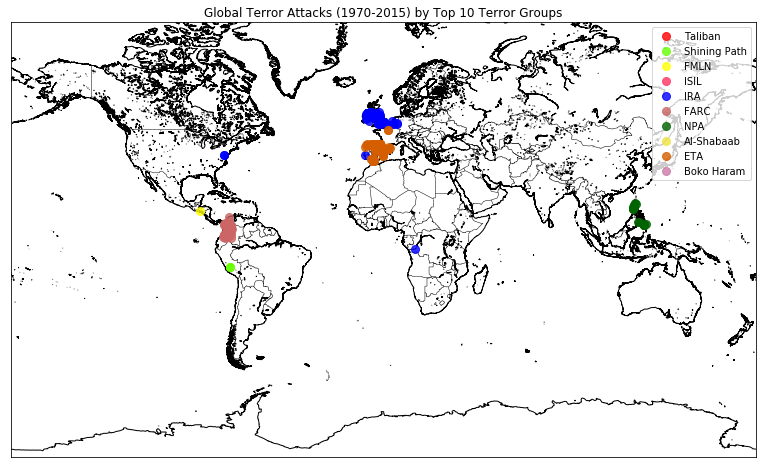

In [60]:
plt.figure(figsize=(15,8))

terror = t_file[t_file['iyear']<1980]

taliban = terror[terror["gname"] == "Taliban"]
shiningpath = terror[terror["gname"] == "Shining Path (SL)"]
fmln = terror[terror["gname"] == "Farabundo Marti National Liberation Front (FMLN)"]
isil = terror[terror["gname"] == "Islamic State of Iraq and the Levant (ISIL)"]
ira = terror[terror["gname"] == "Irish Republican Army (IRA)"]
farc = terror[terror["gname"] == "Revolutionary Armed Forces of Colombia (FARC)"]
npa = terror[terror["gname"] == "New People's Army (NPA)"]
alsh = terror[terror["gname"] == "Al-Shabaab"]
eta = terror[terror["gname"] == "Basque Fatherland and Freedom (ETA)"]
boko = terror[terror["gname"] == "Boko Haram"]

m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

x, y = m(list(taliban["longitude"].astype("float")), list(taliban["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FF0000", label = "Taliban")

x, y = m(list(shiningpath["longitude"].astype("float")), list(shiningpath["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#66FF00", label = "Shining Path")

x, y = m(list(fmln["longitude"].astype("float")), list(fmln["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FFFF00", label = "FMLN")

x, y = m(list(isil["longitude"].astype("float")), list(isil["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FF3366", label = "ISIL")

x, y = m(list(ira["longitude"].astype("float")), list(ira["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "blue", label = "IRA")

x, y = m(list(farc["longitude"].astype("float")), list(farc["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#CC6666", label = "FARC")

x, y = m(list(npa["longitude"].astype("float")), list(npa["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "darkgreen", label = "NPA")

x, y = m(list(alsh["longitude"].astype("float")), list(alsh["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#F0E442", label = "Al-Shabaab")

x, y = m(list(eta["longitude"].astype("float")), list(eta["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#D55E00", label = "ETA")

x, y = m(list(boko["longitude"].astype("float")), list(boko["latitude"].astype(float)))
m.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#CC79A7", label = "Boko Haram")

plt.title('Global Terror Attacks (1970-2015) by Top 10 Terror Groups')
plt.legend()
plt.show()